# Lab 1 Analysis Example using Thicket

In [2]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

In [10]:
all_files = glob("*.cali")
print(all_files)

['p16-a65536.cali']


# Read 1 file

In [11]:
tk1 = th.Thicket.from_caliperreader(all_files[0])

What file?

In [12]:
tk1.profile_mapping

OrderedDict([(708127808, 'p16-a65536.cali')])

Call tree

In [19]:
tk1.statsframe.dataframe["Total time"] = tk1.dataframe["Total time"].tolist()
print(tk1.tree(metric_column="Total time"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

576.265 main
├─ 1.408 comm
│  └─ 1.408 comm_large
│     ├─ 1.173 MPI_Bcast
│     └─ 0.234 MPI_Gather
├─ 528.869 comp
│  └─ 528.868 comp_large
├─ 0.000 correctness_check
└─ 0.002 data_init

Legend (Metric: Total time Min: 0.00 Max: 576.26)
█ 518.64 - 576.26
█ 403.39 - 518.64
█ 288.13 - 403.39
█ 172.88 - 288.13
█ 57.63 - 172.88
█ 0.00 - 57.63

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [14]:
tk1.dataframe

,,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,name
node,profile,,,,,,,,
"{'name': 'main', 'type': 'function'}",708127808,1,regionprofile,35.789876,36.329761,36.016556,576.264892,0.015082,main
"{'name': 'data_init', 'type': 'function'}",708127808,2,regionprofile,0.001568,0.001568,0.001568,0.001568,0.000000,data_init
"{'name': 'comm', 'type': 'function'}",708127808,3,regionprofile,0.000675,0.232000,0.088014,1.408220,0.005148,comm
"{'name': 'comm_large', 'type': 'function'}",708127808,4,regionprofile,0.000638,0.231973,0.087971,1.407540,0.005148,comm_large
"{'name': 'MPI_Bcast', 'type': 'function'}",708127808,5,regionprofile,0.000439,0.191683,0.073339,1.173416,0.004119,MPI_Bcast
"{'name': 'MPI_Gather', 'type': 'function'}",708127808,8,regionprofile,0.000121,0.231488,0.014597,0.233556,0.003136,MPI_Gather
"{'name': 'comp', 'type': 'function'}",708127808,6,regionprofile,32.913797,33.274538,33.054332,528.869319,0.009568,comp
"{'name': 'comp_large', 'type': 'function'}",708127808,7,regionprofile,32.913739,33.274459,33.054276,528.868410,0.009568,comp_large
"{'name': 'correctness_check', 'type': 'function'}",708127808,9,regionprofile,0.000188,0.000188,0.000188,0.000188,0.000000,correctness_check


Metadata

In [15]:
tk1.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
708127808,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a65536.cali,true,1699916206,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536]",c,EnumerationSort,MPI,float,4,65536,Random,16,0,0,20,Online


# Read 2 files

In [8]:
tk2 = th.Thicket.from_caliperreader(all_files[0:2])

What files?

In [9]:
tk2.profile_mapping

OrderedDict([(119312756, '1_trial/m128-t64_1.cali'),
             (236386245, '1_trial/m128-t256_1.cali')])

Call tree

In [10]:
tk2.statsframe.dataframe["test"] = -1
print(tk2.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.2.1

-1.000 main
├─ -1.000 initialize_matrices
├─ -1.000 l_u_d
└─ -1.000 random_fill

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [11]:
tk2.dataframe

nid      time  \
node                                               profile                    
{'name': 'main', 'type': 'function'}               119312756  1.0  0.000256   
                                                   236386245  1.0  0.000297   
{'name': 'initialize_matrices', 'type': 'functi... 119312756  2.0  0.000117   
                                                   236386245  2.0  0.000106   
{'name': 'l_u_d', 'type': 'function'}              119312756  4.0  0.030897   
                                                   236386245  4.0  0.103118   
{'name': 'random_fill', 'type': 'function'}        119312756  3.0  0.000198   
                                                   236386245  3.0  0.000196   

                                                                             name  
node                                               profile                         
{'name': 'main', 'type': 'function'}               119312756                 main  
                                                   236386245                 main  
{'name': 'initialize_matrices', 'type': 'functi... 119312756  initialize_matrices  
                                                   236386245  initialize_matrices  
{'name': 'l_u_d', 'type': 'function'}              119312756                l_u_d  
                                                   236386245                l_u_d  
{'name': 'random_fill', 'type': 'function'}        119312756          random_fill  
                                                   236386245          random_fill

Metadata

In [12]:
tk2.metadata

,cali.caliper.version,cali.channel,launchdate,libraries,cmdline,cluster,threads,matrix_size
profile,,,,,,,,
119312756,2.11.0-dev,hatchet-region-profile,1692905165,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 128, 64]",c,64,128
236386245,2.11.0-dev,hatchet-region-profile,1692905178,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 128, 256]",c,256,128


# Read n files (n = 33)

In [13]:
tk = th.Thicket.from_caliperreader(all_files)

What files?

In [14]:
tk.profile_mapping

OrderedDict([(49592573, '1_trial/m4096-t128_1.cali'),
             (119312756, '1_trial/m128-t64_1.cali'),
             (184474050, '1_trial/m1024-t256_1.cali'),
             (236386245, '1_trial/m128-t256_1.cali'),
             (434992496, '1_trial/m128-t512_1.cali'),
             (522308383, '1_trial/m4096-t512_1.cali'),
             (648153434, '1_trial/m128-t16_1.cali'),
             (803478236, '1_trial/m1024-t96_1.cali'),
             (903098020, '1_trial/m128-t96_1.cali'),
             (1272683634, '1_trial/m1024-t64_1.cali'),
             (1332356979, '1_trial/m128-t1_1.cali'),
             (1403892545, '1_trial/m1024-t4_1.cali'),
             (1533057350, '1_trial/m4096-t64_1.cali'),
             (1602149472, '1_trial/m128-t128_1.cali'),
             (1634817681, '1_trial/m128-t4_1.cali'),
             (1752143609, '1_trial/m4096-t32_1.cali'),
             (2525292949, '1_trial/m1024-t16_1.cali'),
             (2527822455, '1_trial/m4096-t8_1.cali'),
             (2572444904, 

Call tree

In [15]:
tk.statsframe.dataframe["test"] = -1
print(tk.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.2.1

-1.000 main
├─ -1.000 initialize_matrices
├─ -1.000 l_u_d
└─ -1.000 random_fill

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [16]:
tk.dataframe

nid  \
node                                               profile           
{'name': 'main', 'type': 'function'}               49592573    1.0   
                                                   119312756   1.0   
                                                   184474050   1.0   
                                                   236386245   1.0   
                                                   434992496   1.0   
                                                   522308383   1.0   
                                                   648153434   1.0   
                                                   803478236   1.0   
                                                   903098020   1.0   
                                                   1272683634  1.0   
                                                   1332356979  1.0   
                                                   1403892545  1.0   
                                                   1533057350  1.0   
                                                   1602149472  1.0   
                                                   1634817681  1.0   
                                                   1752143609  1.0   
                                                   2525292949  1.0   
                                                   2527822455  1.0   
                                                   2572444904  1.0   
                                                   2634502429  1.0   
                                                   2677603148  1.0   
                                                   2690982505  1.0   
                                                   2736869013  1.0   
                                                   2793441222  1.0   
                                                   3047317556  1.0   
                                                   3182774769  1.0   
                                                   3197219989  1.0   
                                                   3199340315  1.0   
                                                   3639468607  1.0   
                                                   3769433920  1.0   
                                                   3965541769  1.0   
                                                   3971380179  1.0   
                                                   4135910862  1.0   
{'name': 'initialize_matrices', 'type': 'functi... 49592573    2.0   
                                                   119312756   2.0   
                                                   184474050   2.0   
                                                   236386245   2.0   
                                                   434992496   2.0   
                                                   522308383   2.0   
                                                   648153434   2.0   
                                                   803478236   2.0   
                                                   903098020   2.0   
                                                   1272683634  2.0   
                                                   1332356979  2.0   
                                                   1403892545  2.0   
                                                   1533057350  2.0   
                                                   1602149472  2.0   
                                                   1634817681  2.0   
                                                   1752143609  2.0   
                                                   2525292949  2.0   
                                                   2527822455  2.0   
                                                   2572444904  2.0   
                                                   2634502429  2.0   
                                                   2677603148  2.0   
                                                   2690982505  2.0   
                                                   2736869013  2.0   
   

Metadata

In [17]:
tk.metadata

,cali.caliper.version,cali.channel,launchdate,libraries,cmdline,cluster,threads,matrix_size
profile,,,,,,,,
49592573,2.11.0-dev,hatchet-region-profile,1692915726,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 4096, 128]",c,128,4096
119312756,2.11.0-dev,hatchet-region-profile,1692905165,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 128, 64]",c,64,128
184474050,2.11.0-dev,hatchet-region-profile,1692905204,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 1024, 256]",c,256,1024
236386245,2.11.0-dev,hatchet-region-profile,1692905178,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 128, 256]",c,256,128
434992496,2.11.0-dev,hatchet-region-profile,1692905178,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 128, 512]",c,512,128
522308383,2.11.0-dev,hatchet-region-profile,1692915758,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 4096, 512]",c,512,4096
648153434,2.11.0-dev,hatchet-region-profile,1692905165,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 128, 16]",c,16,128
803478236,2.11.0-dev,hatchet-region-profile,1692905204,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 1024, 96]",c,96,1024
903098020,2.11.0-dev,hatchet-region-profile,1692905178,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 128, 96]",c,96,128


# Goal

programmatically analyze the data by graphing it

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [18]:
tk.metadata

,cali.caliper.version,cali.channel,launchdate,libraries,cmdline,cluster,threads,matrix_size
profile,,,,,,,,
49592573,2.11.0-dev,hatchet-region-profile,1692915726,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 4096, 128]",c,128,4096
119312756,2.11.0-dev,hatchet-region-profile,1692905165,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 128, 64]",c,64,128
184474050,2.11.0-dev,hatchet-region-profile,1692905204,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 1024, 256]",c,256,1024
236386245,2.11.0-dev,hatchet-region-profile,1692905178,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 128, 256]",c,256,128
434992496,2.11.0-dev,hatchet-region-profile,1692905178,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 128, 512]",c,512,128
522308383,2.11.0-dev,hatchet-region-profile,1692915758,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 4096, 512]",c,512,4096
648153434,2.11.0-dev,hatchet-region-profile,1692905165,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 128, 16]",c,16,128
803478236,2.11.0-dev,hatchet-region-profile,1692905204,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 1024, 96]",c,96,1024
903098020,2.11.0-dev,hatchet-region-profile,1692905178,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./luDecomposition, 128, 96]",c,96,128


In [19]:
gb = tk.groupby("matrix_size")

3  thickets created...
{128: <thicket.thicket.Thicket object at 0x2b452b3f0130>, 1024: <thicket.thicket.Thicket object at 0x2b452b490bb0>, 4096: <thicket.thicket.Thicket object at 0x2b452b30f940>}


Compose these 3 groups column-wise to get a holistic view of the data

In [20]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="threads"
)

In [21]:
ctk.dataframe

128            \
                                                            nid      time   
node                                               threads                  
{'name': 'main', 'type': 'function'}               1        1.0  0.000270   
                                                   2        1.0  0.000247   
                                                   4        1.0  0.000256   
                                                   8        1.0  0.000241   
                                                   16       1.0  0.000262   
                                                   32       1.0  0.000264   
                                                   64       1.0  0.000256   
                                                   96       1.0  0.000253   
                                                   128      1.0  0.000287   
                                                   256      1.0  0.000297   
                                                   512      1.0  0.000277   
{'name': 'initialize_matrices', 'type': 'functi... 1        2.0  0.000108   
                                                   2        2.0  0.000108   
                                                   4        2.0  0.000110   
                                                   8        2.0  0.000113   
                                                   16       2.0  0.000109   
                                                   32       2.0  0.000091   
                                                   64       2.0  0.000117   
                                                   96       2.0  0.000083   
                                                   128      2.0  0.000106   
                                                   256      2.0  0.000106   
                                                   512      2.0  0.000124   
{'name': 'l_u_d', 'type': 'function'}              1        4.0  0.002039   
                                                   2        4.0  0.004629   
                                                   4        4.0  0.003537   
                                                   8        4.0  0.002697   
                                                   16       4.0  0.002954   
                                                   32       4.0  0.003223   
                                                   64       4.0  0.030897   
                                                   96       4.0  0.045537   
                                                   128      4.0  0.058092   
                                                   256      4.0  0.103118   
                                                   512      4.0  0.225385   
{'name': 'random_fill', 'type': 'function'}        1        3.0  0.000196   
                                                   2        3.0  0.000198   
                                                   4        3.0  0.000196   
                                                   8        3.0  0.000210   
                                                   16       3.0  0.000198   
                                                   32       3.0  0.000204   
                                                   64       3.0  0.000198   
                                                   96       3.0  0.000197   
                                                   128      3.0  0.000196   
                                                   256      3.0  0.000196   
                                                   512      3.0  0.000203   

                                                           1024            \
                                                            nid      time   
node                                               threads                  
{'name': 'main', 'type': 'function'}               1        1.0  0.000257   
                                                   2        1.0  0.000284   
                                                   4   

In [22]:
ctk.metadata

128                                       \
        cali.caliper.version            cali.channel  launchdate   
threads                                                            
1                 2.11.0-dev  hatchet-region-profile  1692905165   
2                 2.11.0-dev  hatchet-region-profile  1692905165   
4                 2.11.0-dev  hatchet-region-profile  1692905165   
8                 2.11.0-dev  hatchet-region-profile  1692905165   
16                2.11.0-dev  hatchet-region-profile  1692905165   
32                2.11.0-dev  hatchet-region-profile  1692905165   
64                2.11.0-dev  hatchet-region-profile  1692905165   
96                2.11.0-dev  hatchet-region-profile  1692905178   
128               2.11.0-dev  hatchet-region-profile  1692905178   
256               2.11.0-dev  hatchet-region-profile  1692905178   
512               2.11.0-dev  hatchet-region-profile  1692905178   

                                                            \
                                                 libraries   
threads                                                      
1        [/scratch/group/csce435-f23/Caliper/caliper/li...   
2        [/scratch/group/csce435-f23/Caliper/caliper/li...   
4        [/scratch/group/csce435-f23/Caliper/caliper/li...   
8        [/scratch/group/csce435-f23/Caliper/caliper/li...   
16       [/scratch/group/csce435-f23/Caliper/caliper/li...   
32       [/scratch/group/csce435-f23/Caliper/caliper/li...   
64       [/scratch/group/csce435-f23/Caliper/caliper/li...   
96       [/scratch/group/csce435-f23/Caliper/caliper/li...   
128      [/scratch/group/csce435-f23/Caliper/caliper/li...   
256      [/scratch/group/csce435-f23/Caliper/caliper/li...   
512      [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                            \
                               cmdline cluster matrix_size   
threads                                                      
1          [./luDecomposition, 128, 1]       c         128   
2          [./luDecomposition, 128, 2]       c         128   
4          [./luDecomposition, 128, 4]       c         128   
8          [./luDecomposition, 128, 8]       c         128   
16        [./luDecomposition, 128, 16]       c         128   
32        [./luDecomposition, 128, 32]       c         128   
64        [./luDecomposition, 128, 64]       c         128   
96        [./luDecomposition, 128, 96]       c         128   
128      [./luDecomposition, 128, 128]       c         128   
256      [./luDecomposition, 128, 256]       c         128   
512      [./luDecomposition, 128, 512]       c         128   

                        1024                                      \
        cali.caliper.version            cali.channel  launchdate   
threads                                                            
1                 2.11.0-dev  hatchet-region-profile  1692905178   
2                 2.11.0-dev  hatchet-region-profile  1692905185   
4                 2.11.0-dev  hatchet-region-profile  1692905185   
8                 2.11.0-dev  hatchet-region-profile  1692905185   
16                2.11.0-dev  hatchet-region-profile  1692905185   
32                2.11.0-dev  hatchet-region-profile  1692905204   
64                2.11.0-dev  hatchet-region-profile  1692905204   
96                2.11.0-dev  hatchet-region-profile  1692905204   
128               2.11.0-dev  hatchet-region-profile  1692905204   
256               2.11.0-dev  hatchet-region-profile  1692905204   
512               2.11.0-dev  hatchet-region-profile  1692905204   

                                                            \
                                                 libraries   
threads                                                      
1        [/scratch/group/csce435-f23/Caliper/caliper/li...   
2        [/scratch/group/csce435-f23/Caliper/caliper/li...   
4        [/scratch/group/csce435-f23/Caliper/caliper/li...   
8       

Perform pandas operations to get the table in a desirable format for plotting

In [23]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (128, "nid"), (1024, "nid"), (4096, "nid")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("threads", ""): "threads"}).set_index(["name", "threads"])
# Drop "time" label as it is redundant
ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [24]:
ctk.dataframe

128      1024        4096
name                threads                                
main                1        0.000270  0.000257    0.000367
                    2        0.000247  0.000284    0.000406
                    4        0.000256  0.000260    0.000374
                    8        0.000241  0.000278    0.000357
                    16       0.000262  0.000284    0.000356
                    32       0.000264  0.000264    0.000373
                    64       0.000256  0.000284    0.000453
                    96       0.000253  0.000305    0.000417
                    128      0.000287  0.000284    0.000414
                    256      0.000297  0.000317    0.000447
                    512      0.000277  0.000297    0.000446
initialize_matrices 1        0.000108  0.006284    0.026936
                    2        0.000108  0.005923    0.026880
                    4        0.000110  0.006408    0.026419
                    8        0.000113  0.006549    0.026190
                    16       0.000109  0.006487    0.026284
                    32       0.000091  0.006492    0.026562
                    64       0.000117  0.006477    0.027618
                    96       0.000083  0.006572    0.027583
                    128      0.000106  0.006550    0.026337
                    256      0.000106  0.006446    0.026652
                    512      0.000124  0.006644    0.026722
l_u_d               1        0.002039  1.166800  121.267529
                    2        0.004629  1.046033  110.228621
                    4        0.003537  0.683386   75.120958
                    8        0.002697  0.386735   43.865778
                    16       0.002954  0.210762   23.755775
                    32       0.003223  0.114306   12.539047
                    64       0.030897  0.284331    7.422743
                    96       0.045537  0.405799    9.550554
                    128      0.058092  0.480729    7.093327
                    256      0.103118  0.811075   10.172970
                    512      0.225385  1.665464   12.930737
random_fill         1        0.000196  0.011130    0.212025
                    2        0.000198  0.011209    0.202748
                    4        0.000196  0.011121    0.205015
                    8        0.000210  0.011126    0.204378
                    16       0.000198  0.011117    0.205495
                    32       0.000204  0.011111    0.204173
                    64       0.000198  0.011094    0.207396
                    96       0.000197  0.011114    0.205260
                    128      0.000196  0.011469    0.204217
                    256      0.000196  0.011104    0.204553
                    512      0.000203  0.011113    0.206003

In [25]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [26]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [27]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [28]:
ctk.dataframe.loc["main"]

,128,1024,4096
threads,,,
1,0.000270,0.000257,0.000367
2,0.000247,0.000284,0.000406
4,0.000256,0.000260,0.000374
8,0.000241,0.000278,0.000357
16,0.000262,0.000284,0.000356
32,0.000264,0.000264,0.000373
64,0.000256,0.000284,0.000453
96,0.000253,0.000305,0.000417
128,0.000287,0.000284,0.000414


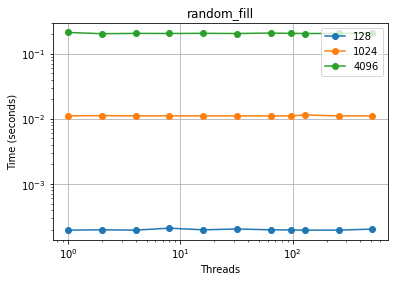

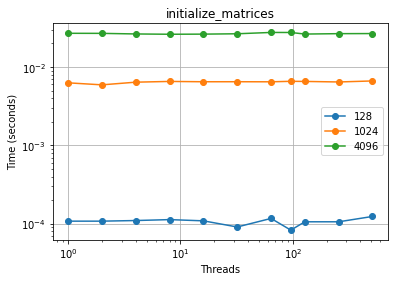

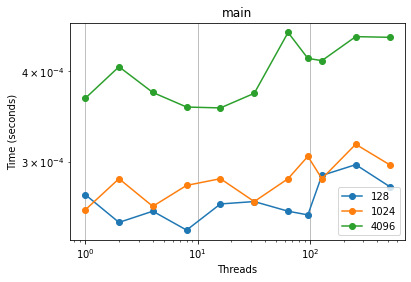

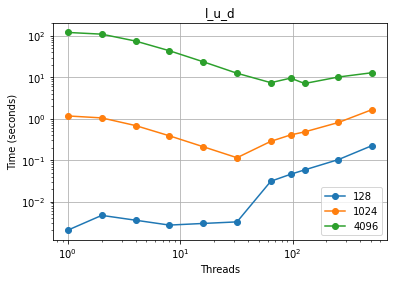

In [29]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

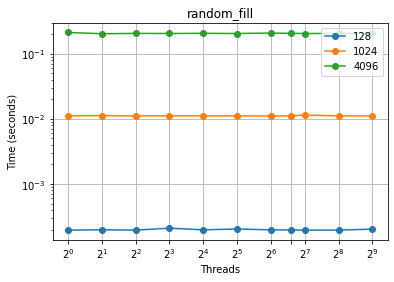

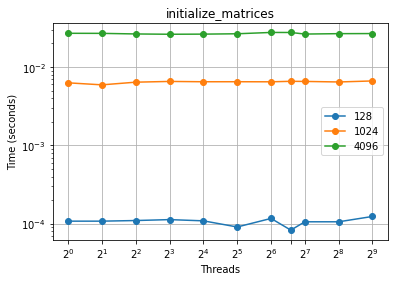

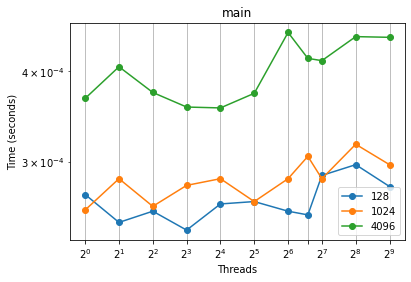

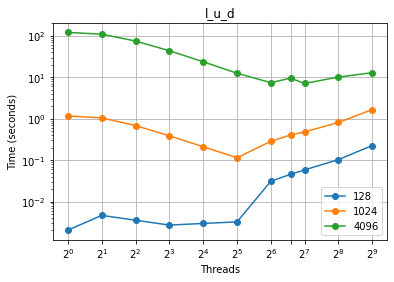

In [30]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
    )

## Speedup

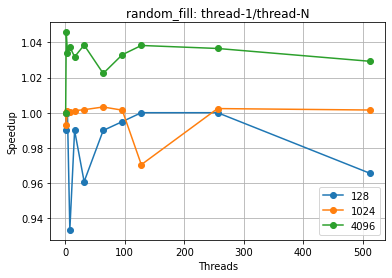

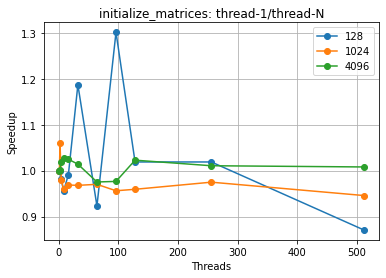

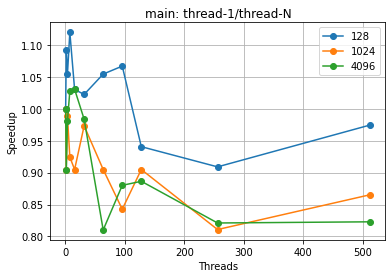

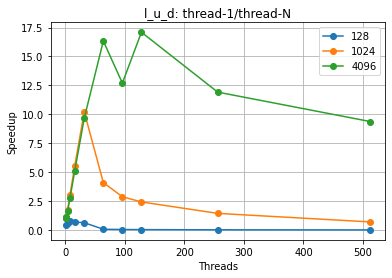

In [31]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )